In [99]:
import pandas as pd
from pandasql import sqldf
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use("ggplot")

In [53]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

# iterate through all stock
# put them into a variable
if "df" not in locals():
    for stock in tech_list:
        globals()[stock.lower()] = yf.download(stock, start, end)

dfs = [aapl, goog, msft, amzn]
# give a company name to each df
for com, df in zip(tech_list, dfs):
    df["company_name"] = com

# concat dfs
df = pd.concat(dfs, axis=0)
assert len(df) == sum([len(df) for df in dfs])

# rename df columns and axis
df.columns = [i.lower().replace(" ", "_") for i in df.columns]
df = df.rename_axis("date")

print(df.shape)
df.head()

(3020, 7)


,open,high,low,close,adj_close,volume,company_name
date,,,,,,,
2020-12-09,124.529999,125.949997,121.000000,121.779999,119.666580,115089200,AAPL
2020-12-10,120.500000,123.870003,120.150002,123.239998,121.101242,81312200,AAPL
2020-12-11,122.430000,122.760002,120.550003,122.410004,120.285652,86939800,AAPL
2020-12-14,122.599998,123.349998,121.540001,121.779999,119.666580,79184500,AAPL
2020-12-15,124.339996,127.900002,124.129997,127.879997,125.660698,157243700,AAPL


# 1. What was the change in price of the stock overtime?

## Closing price

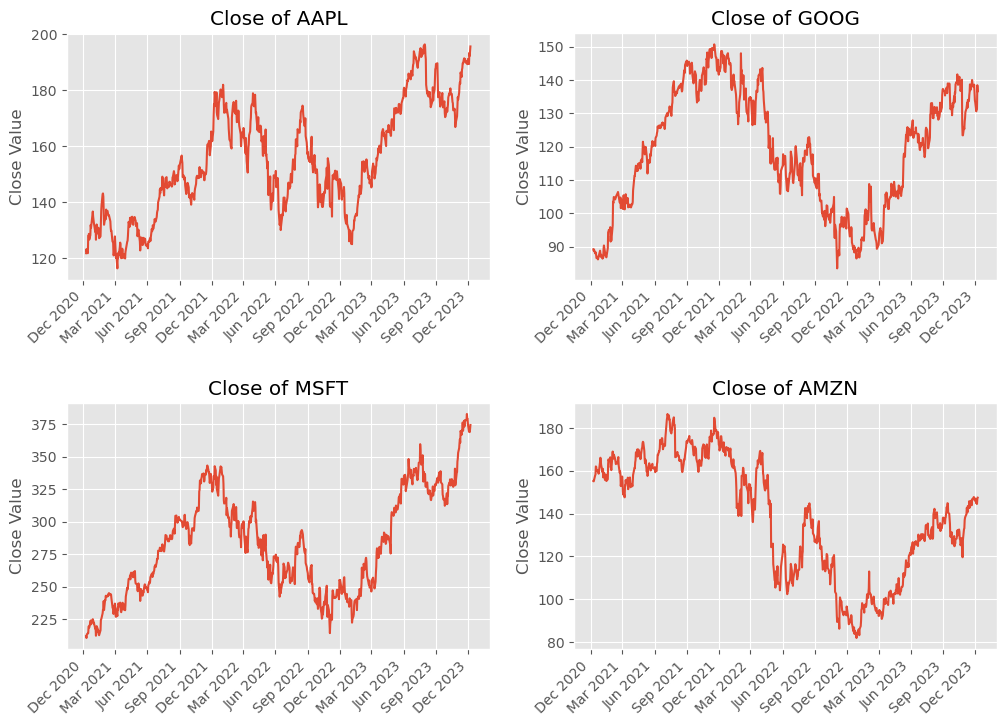

In [100]:
result = sqldf("""
    SELECT date, close, company_name
    FROM df
""")

plt.figure(figsize=(12, 8))

for i, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    
    # filter data for the current company
    data = result.loc[result["company_name"] == company, ["date", "close"]]
    data["date"] = pd.to_datetime(data["date"])
    
    # plot the data
    plt.plot(data['date'], data['close'])
    
    # format x-axis ticks
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=45, ha='right')

    plt.title(f"Close of {company}")
    plt.xlabel('')
    plt.ylabel('Close Value')

plt.subplots_adjust(hspace=0.5)
plt.show()